In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [2]:
# Create benchmark results DataFrame directly
# Experiment: Baseline (without WebCoach)
baseline_no_webcoach = [
    # gpt-4o results
    {'Model': 'gpt-4o', 'Subtask': 'Allrecipes', 'Success_Rate': 0.889, 'Success_Count': 40, 'Total_Count': 45, 'Avg_Time_Seconds': 67, 'Avg_Steps': 7.4},
    {'Model': 'gpt-4o', 'Subtask': 'Amazon', 'Success_Rate': 0.951, 'Success_Count': 39, 'Total_Count': 41, 'Avg_Time_Seconds': 92, 'Avg_Steps': 6.5},
    {'Model': 'gpt-4o', 'Subtask': 'Apple', 'Success_Rate': 0.605, 'Success_Count': 26, 'Total_Count': 43, 'Avg_Time_Seconds': 119, 'Avg_Steps': 11.7},
    {'Model': 'gpt-4o', 'Subtask': 'ArXiv', 'Success_Rate': 0.837, 'Success_Count': 36, 'Total_Count': 43, 'Avg_Time_Seconds': 77, 'Avg_Steps': 8.0},
    {'Model': 'gpt-4o', 'Subtask': 'BBC News', 'Success_Rate': 0.714, 'Success_Count': 30, 'Total_Count': 42, 'Avg_Time_Seconds': 87, 'Avg_Steps': 10.3},
    {'Model': 'gpt-4o', 'Subtask': 'Booking', 'Success_Rate': 0.136, 'Success_Count': 6, 'Total_Count': 44, 'Avg_Time_Seconds': 303, 'Avg_Steps': 18.4},
    {'Model': 'gpt-4o', 'Subtask': 'Cambridge Dictionary', 'Success_Rate': 0.953, 'Success_Count': 41, 'Total_Count': 43, 'Avg_Time_Seconds': 48, 'Avg_Steps': 5.3},
    {'Model': 'gpt-4o', 'Subtask': 'Coursera', 'Success_Rate': 0.595, 'Success_Count': 25, 'Total_Count': 42, 'Avg_Time_Seconds': 109, 'Avg_Steps': 12.9},
    {'Model': 'gpt-4o', 'Subtask': 'ESPN', 'Success_Rate': 0.659, 'Success_Count': 29, 'Total_Count': 44, 'Avg_Time_Seconds': 114, 'Avg_Steps': 11.7},
    {'Model': 'gpt-4o', 'Subtask': 'GitHub', 'Success_Rate': 0.854, 'Success_Count': 35, 'Total_Count': 41, 'Avg_Time_Seconds': 82, 'Avg_Steps': 8.5},
    {'Model': 'gpt-4o', 'Subtask': 'Google Flights', 'Success_Rate': 0.071, 'Success_Count': 3, 'Total_Count': 42, 'Avg_Time_Seconds': 200, 'Avg_Steps': 19.3},
    {'Model': 'gpt-4o', 'Subtask': 'Google Map', 'Success_Rate': 0.878, 'Success_Count': 36, 'Total_Count': 41, 'Avg_Time_Seconds': 81, 'Avg_Steps': 8.2},
    {'Model': 'gpt-4o', 'Subtask': 'Google Search', 'Success_Rate': 0.233, 'Success_Count': 10, 'Total_Count': 43, 'Avg_Time_Seconds': 192, 'Avg_Steps': 15.6},
    {'Model': 'gpt-4o', 'Subtask': 'Huggingface', 'Success_Rate': 0.674, 'Success_Count': 29, 'Total_Count': 43, 'Avg_Time_Seconds': 123, 'Avg_Steps': 11.3},
    {'Model': 'gpt-4o', 'Subtask': 'Wolfram Alpha', 'Success_Rate': 0.761, 'Success_Count': 35, 'Total_Count': 46, 'Avg_Time_Seconds': 79, 'Avg_Steps': 8.3},
    
    # qwen_vl_32b results
    {'Model': 'qwen_vl_32b', 'Subtask': 'Allrecipes', 'Success_Rate': 0.644, 'Success_Count': 29, 'Total_Count': 45, 'Avg_Time_Seconds': 254, 'Avg_Steps': 12.3},
    {'Model': 'qwen_vl_32b', 'Subtask': 'Amazon', 'Success_Rate': 0.707, 'Success_Count': 29, 'Total_Count': 41, 'Avg_Time_Seconds': 210, 'Avg_Steps': 11.1},
    {'Model': 'qwen_vl_32b', 'Subtask': 'Apple', 'Success_Rate': 0.558, 'Success_Count': 24, 'Total_Count': 43, 'Avg_Time_Seconds': 264, 'Avg_Steps': 12.9},
    {'Model': 'qwen_vl_32b', 'Subtask': 'ArXiv', 'Success_Rate': 0.628, 'Success_Count': 27, 'Total_Count': 43, 'Avg_Time_Seconds': 153, 'Avg_Steps': 10.8},
    {'Model': 'qwen_vl_32b', 'Subtask': 'BBC News', 'Success_Rate': 0.571, 'Success_Count': 24, 'Total_Count': 42, 'Avg_Time_Seconds': 159, 'Avg_Steps': 12.0},
    {'Model': 'qwen_vl_32b', 'Subtask': 'Booking', 'Success_Rate': 0.068, 'Success_Count': 3, 'Total_Count': 44, 'Avg_Time_Seconds': 398, 'Avg_Steps': 18.6},
    {'Model': 'qwen_vl_32b', 'Subtask': 'Cambridge Dictionary', 'Success_Rate': 0.837, 'Success_Count': 36, 'Total_Count': 43, 'Avg_Time_Seconds': 92, 'Avg_Steps': 7.6},
    {'Model': 'qwen_vl_32b', 'Subtask': 'Coursera', 'Success_Rate': 0.714, 'Success_Count': 30, 'Total_Count': 42, 'Avg_Time_Seconds': 177, 'Avg_Steps': 13.3},
    {'Model': 'qwen_vl_32b', 'Subtask': 'ESPN', 'Success_Rate': 0.432, 'Success_Count': 19, 'Total_Count': 44, 'Avg_Time_Seconds': 205, 'Avg_Steps': 14.2},
    {'Model': 'qwen_vl_32b', 'Subtask': 'GitHub', 'Success_Rate': 0.537, 'Success_Count': 22, 'Total_Count': 41, 'Avg_Time_Seconds': 157, 'Avg_Steps': 13.8},
    {'Model': 'qwen_vl_32b', 'Subtask': 'Google Flights', 'Success_Rate': 0.071, 'Success_Count': 3, 'Total_Count': 42, 'Avg_Time_Seconds': 249, 'Avg_Steps': 18.6},
    {'Model': 'qwen_vl_32b', 'Subtask': 'Google Map', 'Success_Rate': 0.561, 'Success_Count': 23, 'Total_Count': 41, 'Avg_Time_Seconds': 141, 'Avg_Steps': 11.6},
    {'Model': 'qwen_vl_32b', 'Subtask': 'Google Search', 'Success_Rate': 0.070, 'Success_Count': 3, 'Total_Count': 43, 'Avg_Time_Seconds': 249, 'Avg_Steps': 17.5},
    {'Model': 'qwen_vl_32b', 'Subtask': 'Huggingface', 'Success_Rate': 0.512, 'Success_Count': 22, 'Total_Count': 43, 'Avg_Time_Seconds': 169, 'Avg_Steps': 13.9},
    {'Model': 'qwen_vl_32b', 'Subtask': 'Wolfram Alpha', 'Success_Rate': 0.522, 'Success_Count': 24, 'Total_Count': 46, 'Avg_Time_Seconds': 130, 'Avg_Steps': 11.9},
    
    # qwen_vl_7b results
    {'Model': 'qwen_vl_7b', 'Subtask': 'Allrecipes', 'Success_Rate': 0.356, 'Success_Count': 16, 'Total_Count': 45, 'Avg_Time_Seconds': 142, 'Avg_Steps': 16.1},
    {'Model': 'qwen_vl_7b', 'Subtask': 'Amazon', 'Success_Rate': 0.659, 'Success_Count': 27, 'Total_Count': 41, 'Avg_Time_Seconds': 193, 'Avg_Steps': 17.1},
    {'Model': 'qwen_vl_7b', 'Subtask': 'Apple', 'Success_Rate': 0.209, 'Success_Count': 9, 'Total_Count': 43, 'Avg_Time_Seconds': 187, 'Avg_Steps': 15.6},
    {'Model': 'qwen_vl_7b', 'Subtask': 'ArXiv', 'Success_Rate': 0.233, 'Success_Count': 10, 'Total_Count': 43, 'Avg_Time_Seconds': 166, 'Avg_Steps': 15.0},
    {'Model': 'qwen_vl_7b', 'Subtask': 'BBC News', 'Success_Rate': 0.190, 'Success_Count': 8, 'Total_Count': 42, 'Avg_Time_Seconds': 141, 'Avg_Steps': 14.3},
    {'Model': 'qwen_vl_7b', 'Subtask': 'Booking', 'Success_Rate': 0.182, 'Success_Count': 8, 'Total_Count': 44, 'Avg_Time_Seconds': 162, 'Avg_Steps': 17.5},
    {'Model': 'qwen_vl_7b', 'Subtask': 'Cambridge Dictionary', 'Success_Rate': 0.628, 'Success_Count': 27, 'Total_Count': 43, 'Avg_Time_Seconds': 115, 'Avg_Steps': 13.9},
    {'Model': 'qwen_vl_7b', 'Subtask': 'Coursera', 'Success_Rate': 0.452, 'Success_Count': 19, 'Total_Count': 42, 'Avg_Time_Seconds': 149, 'Avg_Steps': 16.3},
    {'Model': 'qwen_vl_7b', 'Subtask': 'ESPN', 'Success_Rate': 0.182, 'Success_Count': 8, 'Total_Count': 44, 'Avg_Time_Seconds': 178, 'Avg_Steps': 17.9},
    {'Model': 'qwen_vl_7b', 'Subtask': 'GitHub', 'Success_Rate': 0.317, 'Success_Count': 13, 'Total_Count': 41, 'Avg_Time_Seconds': 118, 'Avg_Steps': 16.9},
    {'Model': 'qwen_vl_7b', 'Subtask': 'Google Flights', 'Success_Rate': 0.071, 'Success_Count': 3, 'Total_Count': 42, 'Avg_Time_Seconds': 169, 'Avg_Steps': 18.9},
    {'Model': 'qwen_vl_7b', 'Subtask': 'Google Map', 'Success_Rate': 0.463, 'Success_Count': 19, 'Total_Count': 41, 'Avg_Time_Seconds': 112, 'Avg_Steps': 15.8},
    {'Model': 'qwen_vl_7b', 'Subtask': 'Google Search', 'Success_Rate': 0.279, 'Success_Count': 12, 'Total_Count': 43, 'Avg_Time_Seconds': 114, 'Avg_Steps': 19.0},
    {'Model': 'qwen_vl_7b', 'Subtask': 'Huggingface', 'Success_Rate': 0.279, 'Success_Count': 12, 'Total_Count': 43, 'Avg_Time_Seconds': 107, 'Avg_Steps': 15.0},
    {'Model': 'qwen_vl_7b', 'Subtask': 'Wolfram Alpha', 'Success_Rate': 0.435, 'Success_Count': 20, 'Total_Count': 46, 'Avg_Time_Seconds': 108, 'Avg_Steps': 17.0},
    
    # skywork_r1v3 results
    {'Model': 'skywork_r1v3', 'Subtask': 'Allrecipes', 'Success_Rate': 0.556, 'Success_Count': 25, 'Total_Count': 45, 'Avg_Time_Seconds': 204, 'Avg_Steps': 11.0},
    {'Model': 'skywork_r1v3', 'Subtask': 'Amazon', 'Success_Rate': 0.463, 'Success_Count': 19, 'Total_Count': 41, 'Avg_Time_Seconds': 195, 'Avg_Steps': 9.1},
    {'Model': 'skywork_r1v3', 'Subtask': 'Apple', 'Success_Rate': 0.488, 'Success_Count': 21, 'Total_Count': 43, 'Avg_Time_Seconds': 209, 'Avg_Steps': 10.5},
    {'Model': 'skywork_r1v3', 'Subtask': 'ArXiv', 'Success_Rate': 0.698, 'Success_Count': 30, 'Total_Count': 43, 'Avg_Time_Seconds': 150, 'Avg_Steps': 7.2},
    {'Model': 'skywork_r1v3', 'Subtask': 'BBC News', 'Success_Rate': 0.690, 'Success_Count': 29, 'Total_Count': 42, 'Avg_Time_Seconds': 181, 'Avg_Steps': 9.4},
    {'Model': 'skywork_r1v3', 'Subtask': 'Booking', 'Success_Rate': 0.045, 'Success_Count': 2, 'Total_Count': 44, 'Avg_Time_Seconds': 297, 'Avg_Steps': 12.7},
    {'Model': 'skywork_r1v3', 'Subtask': 'Cambridge Dictionary', 'Success_Rate': 0.721, 'Success_Count': 31, 'Total_Count': 43, 'Avg_Time_Seconds': 119, 'Avg_Steps': 6.4},
    {'Model': 'skywork_r1v3', 'Subtask': 'Coursera', 'Success_Rate': 0.571, 'Success_Count': 24, 'Total_Count': 42, 'Avg_Time_Seconds': 254, 'Avg_Steps': 13.5},
    {'Model': 'skywork_r1v3', 'Subtask': 'ESPN', 'Success_Rate': 0.455, 'Success_Count': 20, 'Total_Count': 44, 'Avg_Time_Seconds': 201, 'Avg_Steps': 9.5},
    {'Model': 'skywork_r1v3', 'Subtask': 'GitHub', 'Success_Rate': 0.610, 'Success_Count': 25, 'Total_Count': 41, 'Avg_Time_Seconds': 274, 'Avg_Steps': 12.9},
    {'Model': 'skywork_r1v3', 'Subtask': 'Google Flights', 'Success_Rate': 0.071, 'Success_Count': 3, 'Total_Count': 42, 'Avg_Time_Seconds': 370, 'Avg_Steps': 16.5},
    {'Model': 'skywork_r1v3', 'Subtask': 'Google Map', 'Success_Rate': 0.610, 'Success_Count': 25, 'Total_Count': 41, 'Avg_Time_Seconds': 205, 'Avg_Steps': 10.4},
    {'Model': 'skywork_r1v3', 'Subtask': 'Google Search', 'Success_Rate': 0.279, 'Success_Count': 12, 'Total_Count': 43, 'Avg_Time_Seconds': 181, 'Avg_Steps': 9.9},
    {'Model': 'skywork_r1v3', 'Subtask': 'Huggingface', 'Success_Rate': 0.581, 'Success_Count': 25, 'Total_Count': 43, 'Avg_Time_Seconds': 214, 'Avg_Steps': 11.1},
    {'Model': 'skywork_r1v3', 'Subtask': 'Wolfram Alpha', 'Success_Rate': 0.283, 'Success_Count': 13, 'Total_Count': 46, 'Avg_Time_Seconds': 178, 'Avg_Steps': 9.9},
]

# Add WebCoach experiment results
# Experiment: With WebCoach (GPT-4o experiences, frozen EMS, GPT-4o as coach)
webcoach_4o_experiences_4o_as_coach = [
    # qwen_vl_32b with WebCoach results
    {'Model': 'qwen_vl_32b_webcoach', 'Subtask': 'Allrecipes', 'Success_Rate': 0.644, 'Success_Count': 29, 'Total_Count': 45, 'Avg_Time_Seconds': 337, 'Avg_Steps': 12.2},
    {'Model': 'qwen_vl_32b_webcoach', 'Subtask': 'Amazon', 'Success_Rate': 0.805, 'Success_Count': 33, 'Total_Count': 41, 'Avg_Time_Seconds': 370, 'Avg_Steps': 11.8},
    {'Model': 'qwen_vl_32b_webcoach', 'Subtask': 'Apple', 'Success_Rate': 0.395, 'Success_Count': 17, 'Total_Count': 43, 'Avg_Time_Seconds': 353, 'Avg_Steps': 13.0},
    {'Model': 'qwen_vl_32b_webcoach', 'Subtask': 'ArXiv', 'Success_Rate': 0.698, 'Success_Count': 30, 'Total_Count': 43, 'Avg_Time_Seconds': 282, 'Avg_Steps': 9.9},
    {'Model': 'qwen_vl_32b_webcoach', 'Subtask': 'BBC News', 'Success_Rate': 0.595, 'Success_Count': 25, 'Total_Count': 42, 'Avg_Time_Seconds': 311, 'Avg_Steps': 12.8},
    {'Model': 'qwen_vl_32b_webcoach', 'Subtask': 'Booking', 'Success_Rate': 0.045, 'Success_Count': 2, 'Total_Count': 44, 'Avg_Time_Seconds': 910, 'Avg_Steps': 15.5},
    {'Model': 'qwen_vl_32b_webcoach', 'Subtask': 'Cambridge Dictionary', 'Success_Rate': 0.907, 'Success_Count': 39, 'Total_Count': 43, 'Avg_Time_Seconds': 261, 'Avg_Steps': 6.1},
    {'Model': 'qwen_vl_32b_webcoach', 'Subtask': 'Coursera', 'Success_Rate': 0.690, 'Success_Count': 29, 'Total_Count': 42, 'Avg_Time_Seconds': 637, 'Avg_Steps': 13.2},
    {'Model': 'qwen_vl_32b_webcoach', 'Subtask': 'ESPN', 'Success_Rate': 0.591, 'Success_Count': 26, 'Total_Count': 44, 'Avg_Time_Seconds': 467, 'Avg_Steps': 8.8},
    {'Model': 'qwen_vl_32b_webcoach', 'Subtask': 'GitHub', 'Success_Rate': 0.829, 'Success_Count': 34, 'Total_Count': 41, 'Avg_Time_Seconds': 520, 'Avg_Steps': 10.4},
    {'Model': 'qwen_vl_32b_webcoach', 'Subtask': 'Google Flights', 'Success_Rate': 0.071, 'Success_Count': 3, 'Total_Count': 42, 'Avg_Time_Seconds': 926, 'Avg_Steps': 17.5},
    {'Model': 'qwen_vl_32b_webcoach', 'Subtask': 'Google Map', 'Success_Rate': 0.732, 'Success_Count': 30, 'Total_Count': 41, 'Avg_Time_Seconds': 461, 'Avg_Steps': 9.7},
    {'Model': 'qwen_vl_32b_webcoach', 'Subtask': 'Google Search', 'Success_Rate': 0.233, 'Success_Count': 10, 'Total_Count': 43, 'Avg_Time_Seconds': 314, 'Avg_Steps': 7.0},
    {'Model': 'qwen_vl_32b_webcoach', 'Subtask': 'Huggingface', 'Success_Rate': 0.674, 'Success_Count': 29, 'Total_Count': 43, 'Avg_Time_Seconds': 425, 'Avg_Steps': 8.9},
    {'Model': 'qwen_vl_32b_webcoach', 'Subtask': 'Wolfram Alpha', 'Success_Rate': 0.348, 'Success_Count': 16, 'Total_Count': 46, 'Avg_Time_Seconds': 341, 'Avg_Steps': 7.5},
    
    # qwen_vl_7b with WebCoach results
    {'Model': 'qwen_vl_7b_webcoach', 'Subtask': 'Allrecipes', 'Success_Rate': 0.311, 'Success_Count': 14, 'Total_Count': 45, 'Avg_Time_Seconds': 292, 'Avg_Steps': 16.5},
    {'Model': 'qwen_vl_7b_webcoach', 'Subtask': 'Amazon', 'Success_Rate': 0.585, 'Success_Count': 24, 'Total_Count': 41, 'Avg_Time_Seconds': 370, 'Avg_Steps': 17.4},
    {'Model': 'qwen_vl_7b_webcoach', 'Subtask': 'Apple', 'Success_Rate': 0.233, 'Success_Count': 10, 'Total_Count': 43, 'Avg_Time_Seconds': 347, 'Avg_Steps': 14.8},
    {'Model': 'qwen_vl_7b_webcoach', 'Subtask': 'ArXiv', 'Success_Rate': 0.209, 'Success_Count': 9, 'Total_Count': 43, 'Avg_Time_Seconds': 312, 'Avg_Steps': 14.4},
    {'Model': 'qwen_vl_7b_webcoach', 'Subtask': 'BBC News', 'Success_Rate': 0.143, 'Success_Count': 6, 'Total_Count': 42, 'Avg_Time_Seconds': 346, 'Avg_Steps': 16.7},
    {'Model': 'qwen_vl_7b_webcoach', 'Subtask': 'Booking', 'Success_Rate': 0.182, 'Success_Count': 8, 'Total_Count': 44, 'Avg_Time_Seconds': 378, 'Avg_Steps': 17.7},
    {'Model': 'qwen_vl_7b_webcoach', 'Subtask': 'Cambridge Dictionary', 'Success_Rate': 0.605, 'Success_Count': 26, 'Total_Count': 43, 'Avg_Time_Seconds': 261, 'Avg_Steps': 13.9},
    {'Model': 'qwen_vl_7b_webcoach', 'Subtask': 'Coursera', 'Success_Rate': 0.357, 'Success_Count': 15, 'Total_Count': 42, 'Avg_Time_Seconds': 348, 'Avg_Steps': 17.7},
    {'Model': 'qwen_vl_7b_webcoach', 'Subtask': 'ESPN', 'Success_Rate': 0.114, 'Success_Count': 5, 'Total_Count': 44, 'Avg_Time_Seconds': 382, 'Avg_Steps': 17.6},
    {'Model': 'qwen_vl_7b_webcoach', 'Subtask': 'GitHub', 'Success_Rate': 0.195, 'Success_Count': 8, 'Total_Count': 41, 'Avg_Time_Seconds': 294, 'Avg_Steps': 17.0},
    {'Model': 'qwen_vl_7b_webcoach', 'Subtask': 'Google Flights', 'Success_Rate': 0.119, 'Success_Count': 5, 'Total_Count': 42, 'Avg_Time_Seconds': 367, 'Avg_Steps': 18.0},
    {'Model': 'qwen_vl_7b_webcoach', 'Subtask': 'Google Map', 'Success_Rate': 0.463, 'Success_Count': 19, 'Total_Count': 41, 'Avg_Time_Seconds': 309, 'Avg_Steps': 16.1},
    {'Model': 'qwen_vl_7b_webcoach', 'Subtask': 'Google Search', 'Success_Rate': 0.140, 'Success_Count': 6, 'Total_Count': 43, 'Avg_Time_Seconds': 336, 'Avg_Steps': 18.3},
    {'Model': 'qwen_vl_7b_webcoach', 'Subtask': 'Huggingface', 'Success_Rate': 0.163, 'Success_Count': 7, 'Total_Count': 43, 'Avg_Time_Seconds': 317, 'Avg_Steps': 15.3},
    {'Model': 'qwen_vl_7b_webcoach', 'Subtask': 'Wolfram Alpha', 'Success_Rate': 0.500, 'Success_Count': 23, 'Total_Count': 46, 'Avg_Time_Seconds': 330, 'Avg_Steps': 17.0},
    
    # skywork_r1v3 with WebCoach results
    {'Model': 'skywork_r1v3_webcoach', 'Subtask': 'Allrecipes', 'Success_Rate': 0.600, 'Success_Count': 27, 'Total_Count': 45, 'Avg_Time_Seconds': 561, 'Avg_Steps': 12.5},
    {'Model': 'skywork_r1v3_webcoach', 'Subtask': 'Amazon', 'Success_Rate': 0.829, 'Success_Count': 34, 'Total_Count': 41, 'Avg_Time_Seconds': 556, 'Avg_Steps': 11.1},
    {'Model': 'skywork_r1v3_webcoach', 'Subtask': 'Apple', 'Success_Rate': 0.395, 'Success_Count': 17, 'Total_Count': 43, 'Avg_Time_Seconds': 667, 'Avg_Steps': 13.7},
    {'Model': 'skywork_r1v3_webcoach', 'Subtask': 'ArXiv', 'Success_Rate': 0.721, 'Success_Count': 31, 'Total_Count': 43, 'Avg_Time_Seconds': 322, 'Avg_Steps': 7.1},
    {'Model': 'skywork_r1v3_webcoach', 'Subtask': 'BBC News', 'Success_Rate': 0.667, 'Success_Count': 28, 'Total_Count': 42, 'Avg_Time_Seconds': 479, 'Avg_Steps': 10.4},
    {'Model': 'skywork_r1v3_webcoach', 'Subtask': 'Booking', 'Success_Rate': 0.091, 'Success_Count': 4, 'Total_Count': 44, 'Avg_Time_Seconds': 858, 'Avg_Steps': 14.8},
    {'Model': 'skywork_r1v3_webcoach', 'Subtask': 'Cambridge Dictionary', 'Success_Rate': 0.953, 'Success_Count': 41, 'Total_Count': 43, 'Avg_Time_Seconds': 273, 'Avg_Steps': 6.1},
    {'Model': 'skywork_r1v3_webcoach', 'Subtask': 'Coursera', 'Success_Rate': 0.738, 'Success_Count': 31, 'Total_Count': 42, 'Avg_Time_Seconds': 535, 'Avg_Steps': 11.3},
    {'Model': 'skywork_r1v3_webcoach', 'Subtask': 'ESPN', 'Success_Rate': 0.614, 'Success_Count': 27, 'Total_Count': 44, 'Avg_Time_Seconds': 460, 'Avg_Steps': 9.1},
    {'Model': 'skywork_r1v3_webcoach', 'Subtask': 'GitHub', 'Success_Rate': 0.829, 'Success_Count': 34, 'Total_Count': 41, 'Avg_Time_Seconds': 526, 'Avg_Steps': 10.6},
    {'Model': 'skywork_r1v3_webcoach', 'Subtask': 'Google Flights', 'Success_Rate': 0.095, 'Success_Count': 4, 'Total_Count': 42, 'Avg_Time_Seconds': 882, 'Avg_Steps': 17.8},
    {'Model': 'skywork_r1v3_webcoach', 'Subtask': 'Google Map', 'Success_Rate': 0.707, 'Success_Count': 29, 'Total_Count': 41, 'Avg_Time_Seconds': 426, 'Avg_Steps': 9.5},
    {'Model': 'skywork_r1v3_webcoach', 'Subtask': 'Google Search', 'Success_Rate': 0.302, 'Success_Count': 13, 'Total_Count': 43, 'Avg_Time_Seconds': 413, 'Avg_Steps': 9.0},
    {'Model': 'skywork_r1v3_webcoach', 'Subtask': 'Huggingface', 'Success_Rate': 0.605, 'Success_Count': 26, 'Total_Count': 43, 'Avg_Time_Seconds': 460, 'Avg_Steps': 10.1},
    {'Model': 'skywork_r1v3_webcoach', 'Subtask': 'Wolfram Alpha', 'Success_Rate': 0.239, 'Success_Count': 11, 'Total_Count': 46, 'Avg_Time_Seconds': 383, 'Avg_Steps': 8.3},
]

# Add WebCoach experiment results with Qwen3-8b as coach
# Experiment: With WebCoach (GPT-4o experiences, frozen EMS, Qwen3-8b as coach)
webcoach_4o_experiences_qwen3_8b_as_coach = [
    # qwen_vl_32b with WebCoach (Qwen3-8b as coach) results
    {'Model': 'qwen_vl_32b_webcoach_qwen3_8b', 'Subtask': 'Allrecipes', 'Success_Rate': 0.644, 'Success_Count': 29, 'Total_Count': 45, 'Avg_Time_Seconds': 305, 'Avg_Steps': 11.7},
    {'Model': 'qwen_vl_32b_webcoach_qwen3_8b', 'Subtask': 'Amazon', 'Success_Rate': 0.805, 'Success_Count': 33, 'Total_Count': 41, 'Avg_Time_Seconds': 276, 'Avg_Steps': 9.9},
    {'Model': 'qwen_vl_32b_webcoach_qwen3_8b', 'Subtask': 'Apple', 'Success_Rate': 0.488, 'Success_Count': 21, 'Total_Count': 43, 'Avg_Time_Seconds': 402, 'Avg_Steps': 14.5},
    {'Model': 'qwen_vl_32b_webcoach_qwen3_8b', 'Subtask': 'ArXiv', 'Success_Rate': 0.721, 'Success_Count': 31, 'Total_Count': 43, 'Avg_Time_Seconds': 261, 'Avg_Steps': 10.0},
    {'Model': 'qwen_vl_32b_webcoach_qwen3_8b', 'Subtask': 'BBC News', 'Success_Rate': 0.571, 'Success_Count': 24, 'Total_Count': 42, 'Avg_Time_Seconds': 259, 'Avg_Steps': 12.5},
    {'Model': 'qwen_vl_32b_webcoach_qwen3_8b', 'Subtask': 'Booking', 'Success_Rate': 0.045, 'Success_Count': 2, 'Total_Count': 44, 'Avg_Time_Seconds': 869, 'Avg_Steps': 17.2},
    {'Model': 'qwen_vl_32b_webcoach_qwen3_8b', 'Subtask': 'Cambridge Dictionary', 'Success_Rate': 0.930, 'Success_Count': 40, 'Total_Count': 43, 'Avg_Time_Seconds': 253, 'Avg_Steps': 6.0},
    {'Model': 'qwen_vl_32b_webcoach_qwen3_8b', 'Subtask': 'Coursera', 'Success_Rate': 0.690, 'Success_Count': 29, 'Total_Count': 42, 'Avg_Time_Seconds': 553, 'Avg_Steps': 12.1},
    {'Model': 'qwen_vl_32b_webcoach_qwen3_8b', 'Subtask': 'ESPN', 'Success_Rate': 0.614, 'Success_Count': 27, 'Total_Count': 44, 'Avg_Time_Seconds': 507, 'Avg_Steps': 10.5},
    {'Model': 'qwen_vl_32b_webcoach_qwen3_8b', 'Subtask': 'GitHub', 'Success_Rate': 0.805, 'Success_Count': 33, 'Total_Count': 41, 'Avg_Time_Seconds': 447, 'Avg_Steps': 9.3},
    {'Model': 'qwen_vl_32b_webcoach_qwen3_8b', 'Subtask': 'Google Flights', 'Success_Rate': 0.119, 'Success_Count': 5, 'Total_Count': 42, 'Avg_Time_Seconds': 538, 'Avg_Steps': 18.4},
    {'Model': 'qwen_vl_32b_webcoach_qwen3_8b', 'Subtask': 'Google Map', 'Success_Rate': 0.732, 'Success_Count': 30, 'Total_Count': 41, 'Avg_Time_Seconds': 279, 'Avg_Steps': 10.8},
    {'Model': 'qwen_vl_32b_webcoach_qwen3_8b', 'Subtask': 'Google Search', 'Success_Rate': 0.070, 'Success_Count': 3, 'Total_Count': 43, 'Avg_Time_Seconds': 504, 'Avg_Steps': 17.3},
    {'Model': 'qwen_vl_32b_webcoach_qwen3_8b', 'Subtask': 'Huggingface', 'Success_Rate': 0.535, 'Success_Count': 23, 'Total_Count': 43, 'Avg_Time_Seconds': 359, 'Avg_Steps': 12.6},
    {'Model': 'qwen_vl_32b_webcoach_qwen3_8b', 'Subtask': 'Wolfram Alpha', 'Success_Rate': 0.717, 'Success_Count': 33, 'Total_Count': 46, 'Avg_Time_Seconds': 277, 'Avg_Steps': 9.8},
    
    # qwen_vl_7b with WebCoach (Qwen3-8b as coach) results
    {'Model': 'qwen_vl_7b_webcoach_qwen3_8b', 'Subtask': 'Allrecipes', 'Success_Rate': 0.267, 'Success_Count': 12, 'Total_Count': 45, 'Avg_Time_Seconds': 328, 'Avg_Steps': 16.3},
    {'Model': 'qwen_vl_7b_webcoach_qwen3_8b', 'Subtask': 'Amazon', 'Success_Rate': 0.488, 'Success_Count': 20, 'Total_Count': 41, 'Avg_Time_Seconds': 349, 'Avg_Steps': 15.0},
    {'Model': 'qwen_vl_7b_webcoach_qwen3_8b', 'Subtask': 'Apple', 'Success_Rate': 0.233, 'Success_Count': 10, 'Total_Count': 43, 'Avg_Time_Seconds': 354, 'Avg_Steps': 15.8},
    {'Model': 'qwen_vl_7b_webcoach_qwen3_8b', 'Subtask': 'ArXiv', 'Success_Rate': 0.233, 'Success_Count': 10, 'Total_Count': 43, 'Avg_Time_Seconds': 290, 'Avg_Steps': 14.3},
    {'Model': 'qwen_vl_7b_webcoach_qwen3_8b', 'Subtask': 'BBC News', 'Success_Rate': 0.190, 'Success_Count': 8, 'Total_Count': 42, 'Avg_Time_Seconds': 320, 'Avg_Steps': 15.5},
    {'Model': 'qwen_vl_7b_webcoach_qwen3_8b', 'Subtask': 'Booking', 'Success_Rate': 0.182, 'Success_Count': 8, 'Total_Count': 44, 'Avg_Time_Seconds': 485, 'Avg_Steps': 18.1},
    {'Model': 'qwen_vl_7b_webcoach_qwen3_8b', 'Subtask': 'Cambridge Dictionary', 'Success_Rate': 0.558, 'Success_Count': 24, 'Total_Count': 43, 'Avg_Time_Seconds': 372, 'Avg_Steps': 13.5},
    {'Model': 'qwen_vl_7b_webcoach_qwen3_8b', 'Subtask': 'Coursera', 'Success_Rate': 0.333, 'Success_Count': 14, 'Total_Count': 42, 'Avg_Time_Seconds': 510, 'Avg_Steps': 18.0},
    {'Model': 'qwen_vl_7b_webcoach_qwen3_8b', 'Subtask': 'ESPN', 'Success_Rate': 0.159, 'Success_Count': 7, 'Total_Count': 44, 'Avg_Time_Seconds': 437, 'Avg_Steps': 16.7},
    {'Model': 'qwen_vl_7b_webcoach_qwen3_8b', 'Subtask': 'GitHub', 'Success_Rate': 0.220, 'Success_Count': 9, 'Total_Count': 41, 'Avg_Time_Seconds': 445, 'Avg_Steps': 18.4},
    {'Model': 'qwen_vl_7b_webcoach_qwen3_8b', 'Subtask': 'Google Flights', 'Success_Rate': 0.214, 'Success_Count': 9, 'Total_Count': 42, 'Avg_Time_Seconds': 377, 'Avg_Steps': 18.2},
    {'Model': 'qwen_vl_7b_webcoach_qwen3_8b', 'Subtask': 'Google Map', 'Success_Rate': 0.390, 'Success_Count': 16, 'Total_Count': 41, 'Avg_Time_Seconds': 318, 'Avg_Steps': 16.0},
    {'Model': 'qwen_vl_7b_webcoach_qwen3_8b', 'Subtask': 'Google Search', 'Success_Rate': 0.116, 'Success_Count': 5, 'Total_Count': 43, 'Avg_Time_Seconds': 342, 'Avg_Steps': 18.5},
    {'Model': 'qwen_vl_7b_webcoach_qwen3_8b', 'Subtask': 'Huggingface', 'Success_Rate': 0.233, 'Success_Count': 10, 'Total_Count': 43, 'Avg_Time_Seconds': 320, 'Avg_Steps': 16.1},
    {'Model': 'qwen_vl_7b_webcoach_qwen3_8b', 'Subtask': 'Wolfram Alpha', 'Success_Rate': 0.543, 'Success_Count': 25, 'Total_Count': 46, 'Avg_Time_Seconds': 299, 'Avg_Steps': 15.9},
    
    # skywork_r1v3 with WebCoach (Qwen3-8b as coach) results
    {'Model': 'skywork_r1v3_webcoach_qwen3_8b', 'Subtask': 'Allrecipes', 'Success_Rate': 0.711, 'Success_Count': 32, 'Total_Count': 45, 'Avg_Time_Seconds': 406, 'Avg_Steps': 10.0},
    {'Model': 'skywork_r1v3_webcoach_qwen3_8b', 'Subtask': 'Amazon', 'Success_Rate': 0.732, 'Success_Count': 30, 'Total_Count': 41, 'Avg_Time_Seconds': 477, 'Avg_Steps': 9.7},
    {'Model': 'skywork_r1v3_webcoach_qwen3_8b', 'Subtask': 'Apple', 'Success_Rate': 0.605, 'Success_Count': 26, 'Total_Count': 43, 'Avg_Time_Seconds': 460, 'Avg_Steps': 10.5},
    {'Model': 'skywork_r1v3_webcoach_qwen3_8b', 'Subtask': 'ArXiv', 'Success_Rate': 0.791, 'Success_Count': 34, 'Total_Count': 43, 'Avg_Time_Seconds': 268, 'Avg_Steps': 5.9},
    {'Model': 'skywork_r1v3_webcoach_qwen3_8b', 'Subtask': 'BBC News', 'Success_Rate': 0.619, 'Success_Count': 26, 'Total_Count': 42, 'Avg_Time_Seconds': 411, 'Avg_Steps': 9.5},
    {'Model': 'skywork_r1v3_webcoach_qwen3_8b', 'Subtask': 'Booking', 'Success_Rate': 0.068, 'Success_Count': 3, 'Total_Count': 44, 'Avg_Time_Seconds': 870, 'Avg_Steps': 15.6},
    {'Model': 'skywork_r1v3_webcoach_qwen3_8b', 'Subtask': 'Cambridge Dictionary', 'Success_Rate': 0.837, 'Success_Count': 36, 'Total_Count': 43, 'Avg_Time_Seconds': 241, 'Avg_Steps': 6.1},
    {'Model': 'skywork_r1v3_webcoach_qwen3_8b', 'Subtask': 'Coursera', 'Success_Rate': 0.690, 'Success_Count': 29, 'Total_Count': 42, 'Avg_Time_Seconds': 589, 'Avg_Steps': 12.6},
    {'Model': 'skywork_r1v3_webcoach_qwen3_8b', 'Subtask': 'ESPN', 'Success_Rate': 0.545, 'Success_Count': 24, 'Total_Count': 44, 'Avg_Time_Seconds': 456, 'Avg_Steps': 9.9},
    {'Model': 'skywork_r1v3_webcoach_qwen3_8b', 'Subtask': 'GitHub', 'Success_Rate': 0.878, 'Success_Count': 36, 'Total_Count': 41, 'Avg_Time_Seconds': 412, 'Avg_Steps': 9.2},
    {'Model': 'skywork_r1v3_webcoach_qwen3_8b', 'Subtask': 'Google Flights', 'Success_Rate': 0.095, 'Success_Count': 4, 'Total_Count': 42, 'Avg_Time_Seconds': 892, 'Avg_Steps': 18.0},
    {'Model': 'skywork_r1v3_webcoach_qwen3_8b', 'Subtask': 'Google Map', 'Success_Rate': 0.756, 'Success_Count': 31, 'Total_Count': 41, 'Avg_Time_Seconds': 412, 'Avg_Steps': 9.3},
    {'Model': 'skywork_r1v3_webcoach_qwen3_8b', 'Subtask': 'Google Search', 'Success_Rate': 0.279, 'Success_Count': 12, 'Total_Count': 43, 'Avg_Time_Seconds': 401, 'Avg_Steps': 9.1},
    {'Model': 'skywork_r1v3_webcoach_qwen3_8b', 'Subtask': 'Huggingface', 'Success_Rate': 0.651, 'Success_Count': 28, 'Total_Count': 43, 'Avg_Time_Seconds': 435, 'Avg_Steps': 10.0},
    {'Model': 'skywork_r1v3_webcoach_qwen3_8b', 'Subtask': 'Wolfram Alpha', 'Success_Rate': 0.391, 'Success_Count': 18, 'Total_Count': 46, 'Avg_Time_Seconds': 400, 'Avg_Steps': 8.7},
]



# Combine all experiments
data = baseline_no_webcoach + webcoach_4o_experiences_4o_as_coach + webcoach_4o_experiences_qwen3_8b_as_coach

# Create DataFrame directly
df = pd.DataFrame(data)

# Calculate overall metrics for each experiment
print("=== EXPERIMENT OVERALL METRICS ===")

# Get unique experiments (baseline models)
baseline_models = ['gpt-4o', 'qwen_vl_32b', 'qwen_vl_7b', 'skywork_r1v3']
webcoach_4o_models = ['qwen_vl_32b_webcoach', 'qwen_vl_7b_webcoach', 'skywork_r1v3_webcoach']
webcoach_qwen3_8b_models = ['qwen_vl_32b_webcoach_qwen3_8b', 'qwen_vl_7b_webcoach_qwen3_8b', 'skywork_r1v3_webcoach_qwen3_8b']

all_experiments = {
    'Baseline (No WebCoach)': baseline_models,
    'WebCoach (GPT-4o experiences, GPT-4o as coach)': webcoach_4o_models,
    'WebCoach (GPT-4o experiences, Qwen3-8b as coach)': webcoach_qwen3_8b_models
}

for exp_name, models in all_experiments.items():
    print(f"\n{exp_name}:")
    print("-" * len(exp_name))
    
    for model in models:
        model_data = df[df['Model'] == model]
        if len(model_data) > 0:
            # Calculate weighted averages
            total_success = model_data['Success_Count'].sum()
            total_attempts = model_data['Total_Count'].sum()
            overall_success_rate = total_success / total_attempts if total_attempts > 0 else 0
            
            # Calculate weighted average time and steps
            weighted_time = (model_data['Avg_Time_Seconds'] * model_data['Total_Count']).sum() / total_attempts if total_attempts > 0 else 0
            weighted_steps = (model_data['Avg_Steps'] * model_data['Total_Count']).sum() / total_attempts if total_attempts > 0 else 0
            
            print(f"  {model}:")
            print(f"    Overall Success Rate: {overall_success_rate:.3f} ({total_success}/{total_attempts})")
            print(f"    Average Time: {weighted_time:.1f}s")
            print(f"    Average Steps: {weighted_steps:.1f}")


=== EXPERIMENT OVERALL METRICS ===

Baseline (No WebCoach):
----------------------
  gpt-4o:
    Overall Success Rate: 0.653 (420/643)
    Average Time: 118.4s
    Average Steps: 10.9
  qwen_vl_32b:
    Overall Success Rate: 0.495 (318/643)
    Average Time: 200.9s
    Average Steps: 13.3
  qwen_vl_7b:
    Overall Success Rate: 0.328 (211/643)
    Average Time: 144.0s
    Average Steps: 16.4
  skywork_r1v3:
    Overall Success Rate: 0.473 (304/643)
    Average Time: 215.0s
    Average Steps: 10.7

WebCoach (GPT-4o experiences, GPT-4o as coach):
----------------------------------------------
  qwen_vl_32b_webcoach:
    Overall Success Rate: 0.547 (352/643)
    Average Time: 460.1s
    Average Steps: 10.9
  qwen_vl_7b_webcoach:
    Overall Success Rate: 0.288 (185/643)
    Average Time: 332.6s
    Average Steps: 16.6
  skywork_r1v3_webcoach:
    Overall Success Rate: 0.555 (357/643)
    Average Time: 519.6s
    Average Steps: 10.7

WebCoach (GPT-4o experiences, Qwen3-8b as coach):
------

/tmp/ipykernel_25575/3175450606.py:165: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  fig.legend(handles=[plt.Rectangle((0,0),1,1, color=colors[i], alpha=0.8, edgecolor='black', linewidth=0.5) for i in range(len(experiments))] +
/tmp/ipykernel_25575/3175450606.py:166: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  [plt.Rectangle((0,0),1,1, color=colors[4], alpha=0.8, edgecolor='black', linewidth=0.5)],


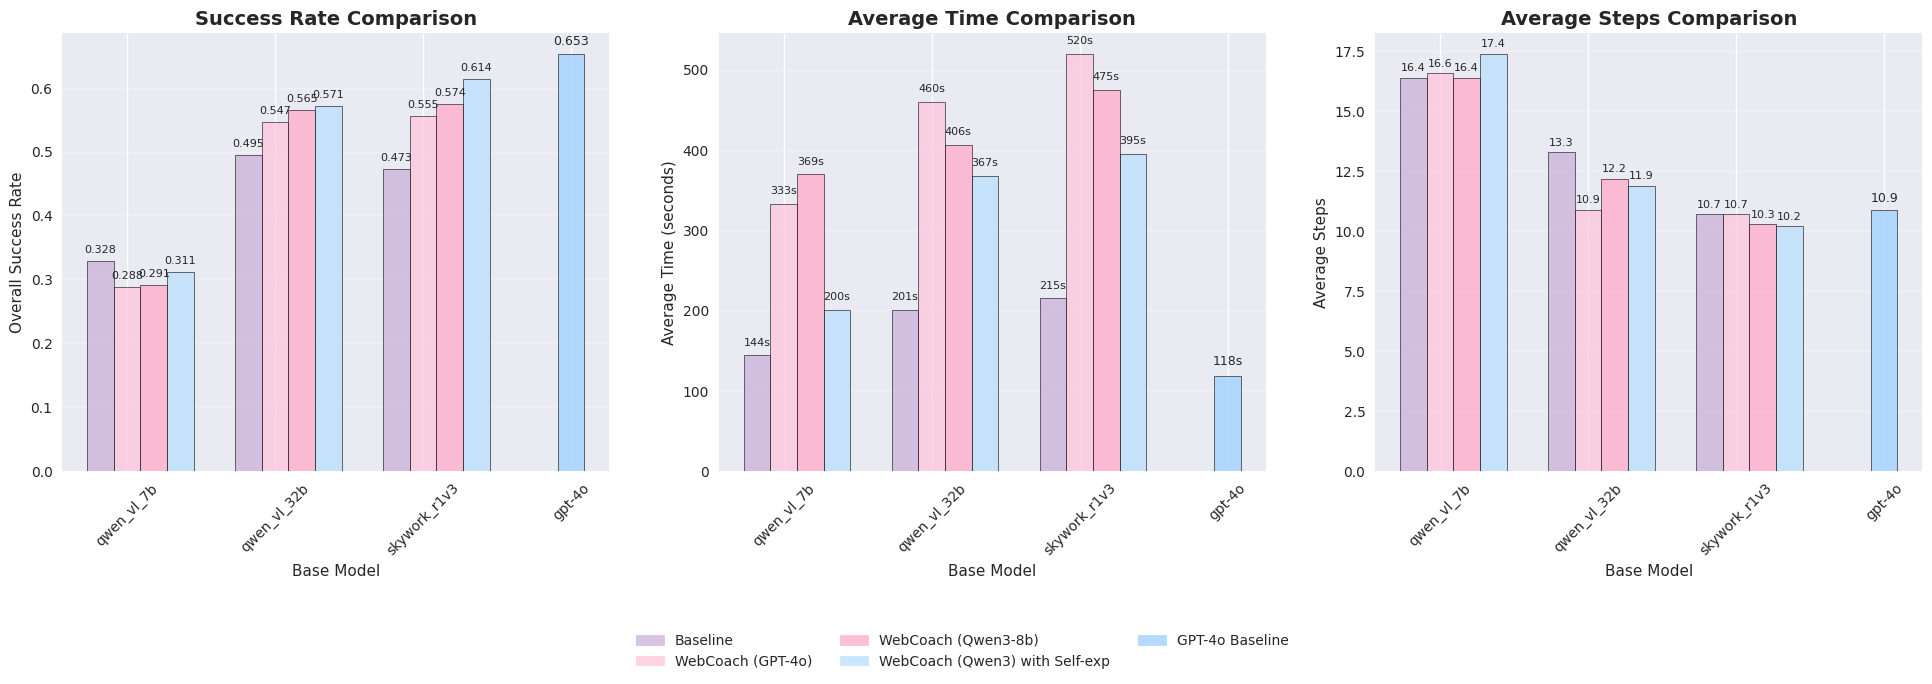


Saving individual subplots...
Saved: success_rate_subplot.pdf
Saved: average_time_subplot.pdf
Saved: average_steps_subplot.pdf
All individual subplots saved successfully!

=== DETAILED COMPARISON TABLE ===
  Base_Model                     Experiment  Success_Rate  Avg_Time  Avg_Steps
      gpt-4o                       Baseline         0.653     118.4       10.9
 qwen_vl_32b                       Baseline         0.495     200.9       13.3
  qwen_vl_7b                       Baseline         0.328     144.0       16.4
skywork_r1v3                       Baseline         0.473     215.0       10.7
 qwen_vl_32b              WebCoach (GPT-4o)         0.547     460.1       10.9
  qwen_vl_7b              WebCoach (GPT-4o)         0.288     332.6       16.6
skywork_r1v3              WebCoach (GPT-4o)         0.555     519.6       10.7
 qwen_vl_32b            WebCoach (Qwen3-8b)         0.565     406.4       12.2
  qwen_vl_7b            WebCoach (Qwen3-8b)         0.291     369.4       16.4
sky

In [8]:
# Performance comparison across experiments for same models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create overall metrics from the data we already calculated
overall_metrics = [
    # Baseline
    {'Base_Model': 'gpt-4o', 'Experiment': 'Baseline', 'Success_Rate': 0.653, 'Avg_Time': 118.4, 'Avg_Steps': 10.9},
    {'Base_Model': 'qwen_vl_32b', 'Experiment': 'Baseline', 'Success_Rate': 0.495, 'Avg_Time': 200.9, 'Avg_Steps': 13.3},
    {'Base_Model': 'qwen_vl_7b', 'Experiment': 'Baseline', 'Success_Rate': 0.328, 'Avg_Time': 144.0, 'Avg_Steps': 16.4},
    {'Base_Model': 'skywork_r1v3', 'Experiment': 'Baseline', 'Success_Rate': 0.473, 'Avg_Time': 215.0, 'Avg_Steps': 10.7},
    
    # WebCoach GPT-4o experiences, GPT-4o as coach
    {'Base_Model': 'qwen_vl_32b', 'Experiment': 'WebCoach (GPT-4o)', 'Success_Rate': 0.547, 'Avg_Time': 460.1, 'Avg_Steps': 10.9},
    {'Base_Model': 'qwen_vl_7b', 'Experiment': 'WebCoach (GPT-4o)', 'Success_Rate': 0.288, 'Avg_Time': 332.6, 'Avg_Steps': 16.6},
    {'Base_Model': 'skywork_r1v3', 'Experiment': 'WebCoach (GPT-4o)', 'Success_Rate': 0.555, 'Avg_Time': 519.6, 'Avg_Steps': 10.7},
    
    # WebCoach GPT-4o experiences, Qwen3-8b as coach
    {'Base_Model': 'qwen_vl_32b', 'Experiment': 'WebCoach (Qwen3-8b)', 'Success_Rate': 0.565, 'Avg_Time': 406.4, 'Avg_Steps': 12.2},
    {'Base_Model': 'qwen_vl_7b', 'Experiment': 'WebCoach (Qwen3-8b)', 'Success_Rate': 0.291, 'Avg_Time': 369.4, 'Avg_Steps': 16.4},
    {'Base_Model': 'skywork_r1v3', 'Experiment': 'WebCoach (Qwen3-8b)', 'Success_Rate': 0.574, 'Avg_Time': 475.0, 'Avg_Steps': 10.3},

    # WebCoach (Qwen3) with Self-experience, Qwen3-8b as coach
    {'Base_Model': 'qwen_vl_32b', 'Experiment': 'WebCoach (Qwen3) with Self-exp', 'Success_Rate': 0.571, 'Avg_Time': 367.4, 'Avg_Steps': 11.9}, # (367/643)
    {'Base_Model': 'qwen_vl_7b', 'Experiment': 'WebCoach (Qwen3) with Self-exp', 'Success_Rate': 0.311, 'Avg_Time': 200.4, 'Avg_Steps': 17.4}, # (200/643)
    {'Base_Model': 'skywork_r1v3', 'Experiment': 'WebCoach (Qwen3) with Self-exp', 'Success_Rate': 0.614, 'Avg_Time': 395.4, 'Avg_Steps': 10.2}, # (395/643)
]

overall_df = pd.DataFrame(overall_metrics)

# Create comparison plots
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Define colors for different experiments - using pastel color palette
colors = ['#CDB4DB', '#FFC8DD', '#FFAFCC', '#BDE0FE', '#A2D2FF']  # Light Purple, Light Pink, Medium Pink, Light Blue, Medium Blue

# Plot 1: Success Rate Comparison
ax1 = axes[0]
# Get all models that have WebCoach experiments, including GPT-4o
all_models = ['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3', 'gpt-4o']
x_pos = np.arange(len(all_models))
width = 0.18  # Reduced width to fit 4 experiments

# Plot WebCoach experiments
experiments = ['Baseline', 'WebCoach (GPT-4o)', 'WebCoach (Qwen3-8b)', 'WebCoach (Qwen3) with Self-exp']
for i, exp in enumerate(experiments):
    exp_data = overall_df[overall_df['Experiment'] == exp]
    # Filter to only include models that have WebCoach experiments
    exp_data_filtered = exp_data[exp_data['Base_Model'].isin(['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3'])]
    exp_data_sorted = exp_data_filtered.set_index('Base_Model').reindex(['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3']).reset_index()
    
    # Plot the first 3 models
    ax1.bar(x_pos[:3] + i*width, exp_data_sorted['Success_Rate'], width, 
            label=exp, alpha=0.8, edgecolor='black', linewidth=0.5, color=colors[i])

# Add GPT-4o baseline as a separate bar with different color
gpt4o_baseline = overall_df[(overall_df['Base_Model'] == 'gpt-4o') & (overall_df['Experiment'] == 'Baseline')]
if len(gpt4o_baseline) > 0:
    # Position GPT-4o at the end
    gpt4o_x = x_pos[3] + width
    ax1.bar(gpt4o_x, gpt4o_baseline['Success_Rate'].iloc[0], width, 
            label='GPT-4o Baseline', alpha=0.8, edgecolor='black', linewidth=0.5, color=colors[4])
    
    # Add value label for GPT-4o
    ax1.text(gpt4o_x, gpt4o_baseline['Success_Rate'].iloc[0] + 0.01, 
            f'{gpt4o_baseline["Success_Rate"].iloc[0]:.3f}', ha='center', va='bottom', fontsize=9)

ax1.set_xlabel('Base Model')
ax1.set_ylabel('Overall Success Rate')
ax1.set_title('Success Rate Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos + width)
ax1.set_xticklabels(all_models, rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, exp in enumerate(experiments):
    exp_data = overall_df[overall_df['Experiment'] == exp]
    exp_data_filtered = exp_data[exp_data['Base_Model'].isin(['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3'])]
    exp_data_sorted = exp_data_filtered.set_index('Base_Model').reindex(['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3']).reset_index()
    
    for j, (idx, row) in enumerate(exp_data_sorted.iterrows()):
        ax1.text(x_pos[j] + i*width, row['Success_Rate'] + 0.01, 
                f'{row["Success_Rate"]:.3f}', ha='center', va='bottom', fontsize=8)

# Plot 2: Average Time Comparison
ax2 = axes[1]
for i, exp in enumerate(experiments):
    exp_data = overall_df[overall_df['Experiment'] == exp]
    exp_data_filtered = exp_data[exp_data['Base_Model'].isin(['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3'])]
    exp_data_sorted = exp_data_filtered.set_index('Base_Model').reindex(['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3']).reset_index()
    
    # Plot the first 3 models
    ax2.bar(x_pos[:3] + i*width, exp_data_sorted['Avg_Time'], width, 
            label=exp, alpha=0.8, edgecolor='black', linewidth=0.5, color=colors[i])

# Add GPT-4o baseline
if len(gpt4o_baseline) > 0:
    ax2.bar(gpt4o_x, gpt4o_baseline['Avg_Time'].iloc[0], width, 
            label='GPT-4o Baseline', alpha=0.8, edgecolor='black', linewidth=0.5, color=colors[4])
    
    # Add value label for GPT-4o
    ax2.text(gpt4o_x, gpt4o_baseline['Avg_Time'].iloc[0] + 10, 
            f'{gpt4o_baseline["Avg_Time"].iloc[0]:.0f}s', ha='center', va='bottom', fontsize=9)

ax2.set_xlabel('Base Model')
ax2.set_ylabel('Average Time (seconds)')
ax2.set_title('Average Time Comparison', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos + width)
ax2.set_xticklabels(all_models, rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, exp in enumerate(experiments):
    exp_data = overall_df[overall_df['Experiment'] == exp]
    exp_data_filtered = exp_data[exp_data['Base_Model'].isin(['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3'])]
    exp_data_sorted = exp_data_filtered.set_index('Base_Model').reindex(['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3']).reset_index()
    
    for j, (idx, row) in enumerate(exp_data_sorted.iterrows()):
        ax2.text(x_pos[j] + i*width, row['Avg_Time'] + 10, 
                f'{row["Avg_Time"]:.0f}s', ha='center', va='bottom', fontsize=8)

# Plot 3: Average Steps Comparison
ax3 = axes[2]
for i, exp in enumerate(experiments):
    exp_data = overall_df[overall_df['Experiment'] == exp]
    exp_data_filtered = exp_data[exp_data['Base_Model'].isin(['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3'])]
    exp_data_sorted = exp_data_filtered.set_index('Base_Model').reindex(['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3']).reset_index()
    
    # Plot the first 3 models
    ax3.bar(x_pos[:3] + i*width, exp_data_sorted['Avg_Steps'], width, 
            label=exp, alpha=0.8, edgecolor='black', linewidth=0.5, color=colors[i])

# Add GPT-4o baseline
if len(gpt4o_baseline) > 0:
    ax3.bar(gpt4o_x, gpt4o_baseline['Avg_Steps'].iloc[0], width, 
            label='GPT-4o Baseline', alpha=0.8, edgecolor='black', linewidth=0.5, color=colors[4])
    
    # Add value label for GPT-4o
    ax3.text(gpt4o_x, gpt4o_baseline['Avg_Steps'].iloc[0] + 0.2, 
            f'{gpt4o_baseline["Avg_Steps"].iloc[0]:.1f}', ha='center', va='bottom', fontsize=9)

ax3.set_xlabel('Base Model')
ax3.set_ylabel('Average Steps')
ax3.set_title('Average Steps Comparison', fontsize=14, fontweight='bold')
ax3.set_xticks(x_pos + width)
ax3.set_xticklabels(all_models, rotation=45)
ax3.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, exp in enumerate(experiments):
    exp_data = overall_df[overall_df['Experiment'] == exp]
    exp_data_filtered = exp_data[exp_data['Base_Model'].isin(['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3'])]
    exp_data_sorted = exp_data_filtered.set_index('Base_Model').reindex(['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3']).reset_index()
    
    for j, (idx, row) in enumerate(exp_data_sorted.iterrows()):
        ax3.text(x_pos[j] + i*width, row['Avg_Steps'] + 0.2, 
                f'{row["Avg_Steps"]:.1f}', ha='center', va='bottom', fontsize=8)

# Add a single shared legend
fig.legend(handles=[plt.Rectangle((0,0),1,1, color=colors[i], alpha=0.8, edgecolor='black', linewidth=0.5) for i in range(len(experiments))] + 
           [plt.Rectangle((0,0),1,1, color=colors[4], alpha=0.8, edgecolor='black', linewidth=0.5)],
           labels=experiments + ['GPT-4o Baseline'],
           bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)

# Adjust layout to make room for the legend
plt.subplots_adjust(bottom=0.15)

# Save the combined plot
plt.savefig('success_rate_comparison.pdf', dpi=300, bbox_inches='tight')

plt.show()

# Now save each subplot individually with its own legend
print("\nSaving individual subplots...")

# Create individual plots for each subplot
subplot_configs = [
    {
        'title': 'Success Rate Comparison',
        'ylabel': 'Overall Success Rate',
        'data_col': 'Success_Rate',
        'filename': 'success_rate_subplot.pdf',
        'value_format': '{:.2f}',
        'value_offset': 0.01
    },
    {
        'title': 'Average Time Comparison', 
        'ylabel': 'Average Time (seconds)',
        'data_col': 'Avg_Time',
        'filename': 'average_time_subplot.pdf',
        'value_format': '{:.0f}s',
        'value_offset': 10
    },
    {
        'title': 'Average Steps Comparison',
        'ylabel': 'Average Steps', 
        'data_col': 'Avg_Steps',
        'filename': 'average_steps_subplot.pdf',
        'value_format': '{:.1f}',
        'value_offset': 0.2
    }
]

for config in subplot_configs:
    # Create a new figure for individual subplot - made wider to accommodate value labels
    fig_individual, ax_individual = plt.subplots(1, 1, figsize=(12, 6))
    
    # Plot WebCoach experiments
    for i, exp in enumerate(experiments):
        exp_data = overall_df[overall_df['Experiment'] == exp]
        exp_data_filtered = exp_data[exp_data['Base_Model'].isin(['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3'])]
        exp_data_sorted = exp_data_filtered.set_index('Base_Model').reindex(['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3']).reset_index()
        
        # Plot the first 3 models
        ax_individual.bar(x_pos[:3] + i*width, exp_data_sorted[config['data_col']], width, 
                label=exp, alpha=0.8, edgecolor='black', linewidth=0.5, color=colors[i])

    # Add GPT-4o baseline
    gpt4o_baseline = overall_df[(overall_df['Base_Model'] == 'gpt-4o') & (overall_df['Experiment'] == 'Baseline')]
    if len(gpt4o_baseline) > 0:
        gpt4o_x = x_pos[3] + width
        ax_individual.bar(gpt4o_x, gpt4o_baseline[config['data_col']].iloc[0], width, 
                label='GPT-4o Baseline', alpha=0.8, edgecolor='black', linewidth=0.5, color=colors[4])
        
        # Add value label for GPT-4o
        ax_individual.text(gpt4o_x, gpt4o_baseline[config['data_col']].iloc[0] + config['value_offset'], 
                config['value_format'].format(gpt4o_baseline[config['data_col']].iloc[0]), 
                ha='center', va='bottom', fontsize=9)

    # Set labels and title with larger fonts
    ax_individual.set_xlabel('Base Model', fontsize=14)
    ax_individual.set_ylabel(config['ylabel'], fontsize=14)
    ax_individual.set_title(config['title'], fontsize=16, fontweight='bold')
    ax_individual.set_xticks(x_pos + width)
    ax_individual.set_xticklabels(all_models, rotation=45, fontsize=12)
    ax_individual.tick_params(axis='y', labelsize=12)
    ax_individual.grid(axis='y', alpha=0.3)

    # Add value labels on bars with larger font
    for i, exp in enumerate(experiments):
        exp_data = overall_df[overall_df['Experiment'] == exp]
        exp_data_filtered = exp_data[exp_data['Base_Model'].isin(['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3'])]
        exp_data_sorted = exp_data_filtered.set_index('Base_Model').reindex(['qwen_vl_7b', 'qwen_vl_32b', 'skywork_r1v3']).reset_index()
        
        for j, (idx, row) in enumerate(exp_data_sorted.iterrows()):
            ax_individual.text(x_pos[j] + i*width, row[config['data_col']] + config['value_offset'], 
                    config['value_format'].format(row[config['data_col']]), 
                    ha='center', va='bottom', fontsize=10)

    # Add legend with larger font
    ax_individual.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    
    # Adjust layout to make room for the legend
    plt.tight_layout()
    
    # Save individual subplot
    plt.savefig(config['filename'], dpi=300, bbox_inches='tight')
    print(f"Saved: {config['filename']}")
    
    plt.close(fig_individual)  # Close the figure to free memory

print("All individual subplots saved successfully!")


# Print detailed comparison table
print("\n=== DETAILED COMPARISON TABLE ===")
print(overall_df.round(3).to_string(index=False))
